In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_ds="/kaggle/input/100-bird-species/train"
test_ds="/kaggle/input/100-bird-species/test"
validation_ds="/kaggle/input/100-bird-species/valid"

# Data preprocessing
****

In [3]:
os.listdir('/kaggle/input/100-bird-species/train')

['DALMATIAN PELICAN',
 'BLACK BREASTED PUFFBIRD',
 'WATTLED CURASSOW',
 'AMERICAN WIGEON',
 'CARMINE BEE-EATER',
 'GAMBELS QUAIL',
 'UMBRELLA BIRD',
 'AMERICAN KESTREL',
 'AMERICAN GOLDFINCH',
 'BLUE GROSBEAK',
 'PALM NUT VULTURE',
 'DUSKY LORY',
 'AUCKLAND SHAQ',
 'BLACK THROATED WARBLER',
 'YELLOW CACIQUE',
 'STRIPPED SWALLOW',
 'VERMILION FLYCATHER',
 'CAPE MAY WARBLER',
 'RED TAILED HAWK',
 'GURNEYS PITTA',
 'INDIAN ROLLER',
 'SNOW GOOSE',
 'GREEN WINGED DOVE',
 'AZURE TANAGER',
 'GREEN MAGPIE',
 'BANDED BROADBILL',
 'AFRICAN PYGMY GOOSE',
 'INDIGO FLYCATCHER',
 'GREY PLOVER',
 'TOUCHAN',
 'HYACINTH MACAW',
 'HARLEQUIN DUCK',
 'ABYSSINIAN GROUND HORNBILL',
 'CALIFORNIA QUAIL',
 'BALD IBIS',
 'WOOD THRUSH',
 'RUBY THROATED HUMMINGBIRD',
 'INDIGO BUNTING',
 'ALBERTS TOWHEE',
 'SORA',
 'HOODED MERGANSER',
 'ROSEATE SPOONBILL',
 'CAPE ROCK THRUSH',
 'BLUE COAU',
 'CALIFORNIA CONDOR',
 'BORNEAN PHEASANT',
 'BARN SWALLOW',
 'TAIWAN MAGPIE',
 'SPLENDID WREN',
 'RED BILLED TROPICBIRD',
 'B

In [4]:
batch_size=32
img_size=224

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

val_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')  

validation_generator = val_datagen.flow_from_directory(validation_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [6]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [7]:
img= train_generator[0]
print(img)

(array([[[[0.2584759 , 0.32122102, 0.12906416],
         [0.2584759 , 0.32122102, 0.12906416],
         [0.2584759 , 0.32122102, 0.12906416],
         ...,
         [0.19299023, 0.23266359, 0.11789375],
         [0.18646586, 0.22141236, 0.10942495],
         [0.17679682, 0.21174332, 0.09975592]],

        [[0.25490198, 0.3178839 , 0.12560862],
         [0.25490198, 0.3178839 , 0.12560862],
         [0.25490198, 0.3178839 , 0.12560862],
         ...,
         [0.20214868, 0.23824808, 0.13722993],
         [0.19817573, 0.22954829, 0.13554905],
         [0.18617208, 0.21754463, 0.12354539]],

        [[0.25490198, 0.32526866, 0.129301  ],
         [0.25490198, 0.32526866, 0.129301  ],
         [0.25490198, 0.32526866, 0.129301  ],
         ...,
         [0.22056116, 0.25666058, 0.16156009],
         [0.22898278, 0.26035532, 0.17004848],
         [0.2087129 , 0.24008545, 0.14977859]],

        ...,

        [[0.20784315, 0.27450982, 0.10980393],
         [0.20784315, 0.27450982, 0.10980393

In [8]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [9]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 525)


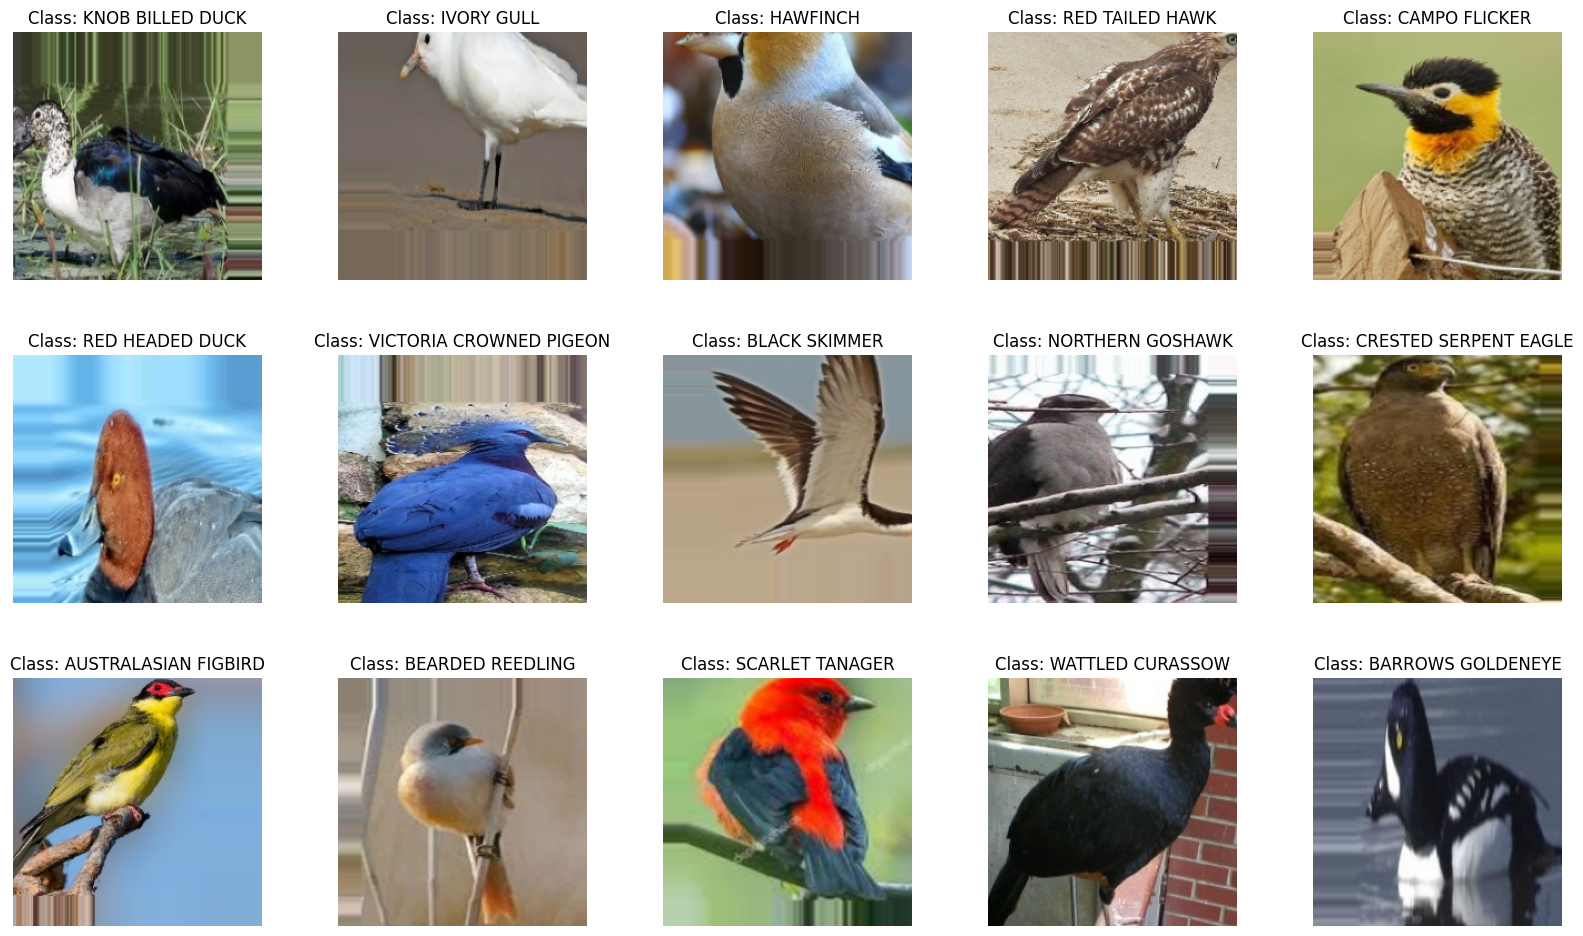

In [10]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [11]:
print(len(train_generator))
print(len(test_ds))
print(len(validation_ds))

2645
35
36


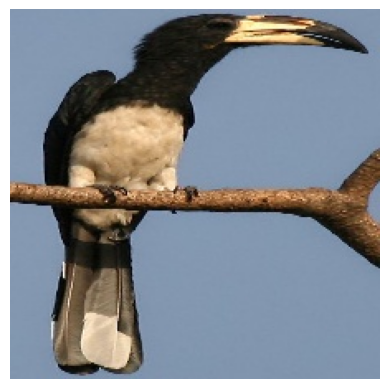

In [12]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/kaggle/input/100-bird-species/train/AFRICAN PIED HORNBILL/008.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [13]:
from keras.layers import MaxPool2D

In [14]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

# Build VGG_16 Model

In [15]:
from keras.layers import MaxPool2D

In [16]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [17]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=525, activation="softmax"))

#   Model summary

In [18]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [20]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [21]:
history =model.fit(train_generator, validation_data=test_generator, epochs=25)

Epoch 1/25
2645/2645 [==============================] - 1708s 639ms/step - loss: 5.8694 - accuracy: 0.0130 - val_loss: 5.0885 - val_accuracy: 0.0549
Epoch 2/25
2645/2645 [==============================] - 1391s 526ms/step - loss: 5.0633 - accuracy: 0.0618 - val_loss: 4.2058 - val_accuracy: 0.1474
Epoch 3/25
2645/2645 [==============================] - 1413s 534ms/step - loss: 4.3433 - accuracy: 0.1415 - val_loss: 3.3820 - val_accuracy: 0.2899
Epoch 4/25
2645/2645 [==============================] - 1418s 536ms/step - loss: 3.7805 - accuracy: 0.2233 - val_loss: 2.7467 - val_accuracy: 0.3893
Epoch 5/25
2645/2645 [==============================] - 1451s 549ms/step - loss: 3.3346 - accuracy: 0.2944 - val_loss: 2.3577 - val_accuracy: 0.4552
Epoch 6/25
2645/2645 [==============================] - 1415s 535ms/step - loss: 2.9832 - accuracy: 0.3575 - val_loss: 2.0568 - val_accuracy: 0.5230
Epoch 7/25
2645/2645 [==============================] - 1448s 548ms/step - loss: 2.6859 - accuracy: 0.4077

In [22]:
n_categories = len(os.listdir('/kaggle/input/100-bird-species/valid'))# number of categories print(n_categories)

In [23]:
n_categories

525

In [24]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,5.869354,0.013044,5.088515,0.054857
1,5.063262,0.061842,4.205842,0.147429
2,4.343294,0.141525,3.381968,0.289905
3,3.780475,0.223336,2.746747,0.389333
4,3.334595,0.294405,2.357651,0.455238


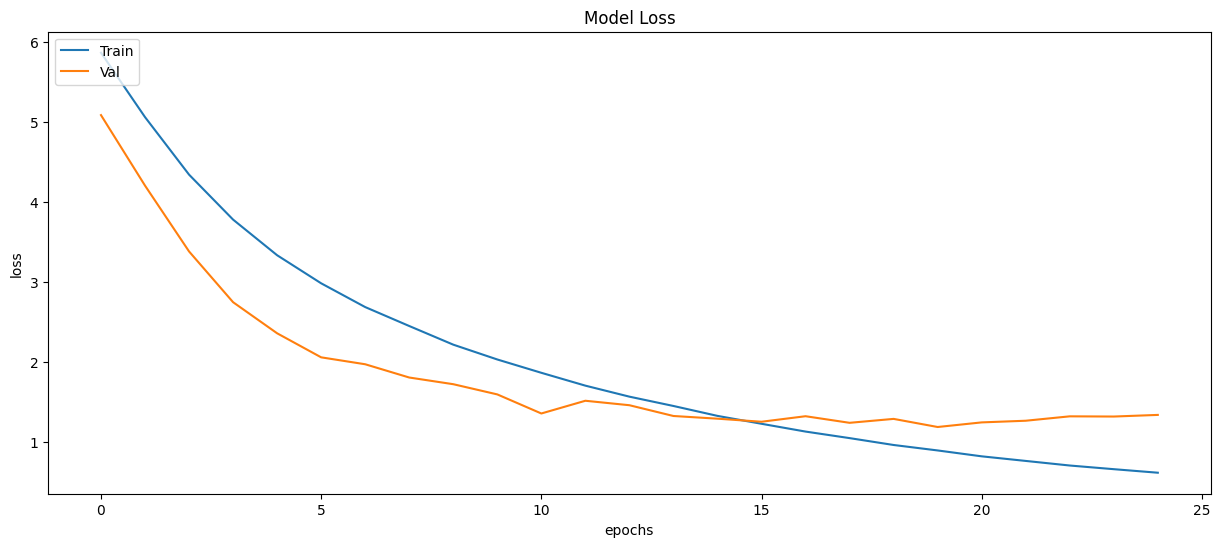

In [25]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

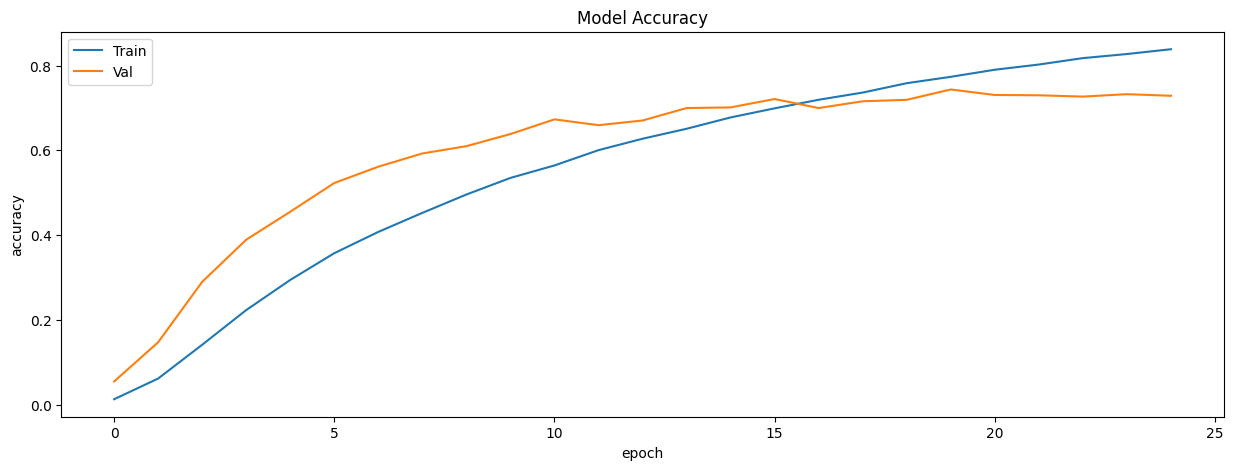

In [26]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [27]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

83/83 [==============================] - 11s 134ms/step


In [28]:
results =model.evaluate(test_generator)

83/83 [==============================] - 11s 135ms/step - loss: 1.3362 - accuracy: 0.7288


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5
           3       0.71      1.00      0.83         5
           4       1.00      0.80      0.89         5
           5       0.80      0.80      0.80         5
           6       0.83      1.00      0.91         5
           7       0.50      0.60      0.55         5
           8       0.71      1.00      0.83         5
           9       1.00      0.40      0.57         5
          10       0.50      0.60      0.55         5
          11       1.00      0.80      0.89         5
          12       0.00      0.00      0.00         5
          13       1.00      0.60      0.75         5
          14       0.71      1.00      0.83         5
          15       0.67      0.80      0.73         5
          16       0.80      0.80      0.80         5
          17       0.75    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 2s 2s/step


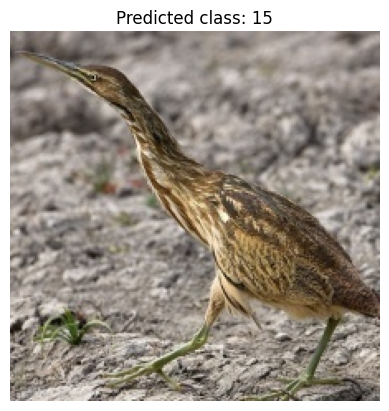

In [ ]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/kaggle/input/100-bird-species/valid/AMERICAN BITTERN'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [ ]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : AMERICAN BITTERN
Class probability: 0.9067752
Predicted class for 2.jpg : SPOTTED CATBIRD
Class probability: 0.8511115
Predicted class for 3.jpg : AMERICAN BITTERN
Class probability: 0.8385729
Predicted class for 4.jpg : AMERICAN BITTERN
Class probability: 0.88711226
Predicted class for 5.jpg : AMERICAN BITTERN
Class probability: 0.99389005


# Thank You !